In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [162]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [136]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [161]:
df["deck"] = df["deck"].fillna("G")
df["embarked"] = df["embarked"].fillna("S")
df["embark_town"] = df["embark_town"].fillna("Southampton")
df["age"] = df["age"].fillna(df["age"].mean())

In [166]:
from sklearn import preprocessing
Ti_e = df.apply(preprocessing.LabelEncoder().fit_transform)
Ti_e

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,2,1,28,1,0,18,2,2,1,1,6,2,0,0
1,1,0,0,52,1,0,207,0,0,2,0,2,0,1,0
2,1,2,0,34,0,0,41,2,2,2,0,6,2,1,1
3,1,0,0,48,1,0,189,2,0,2,0,2,2,1,0
4,0,2,1,48,0,0,43,2,2,1,1,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2,1,1,1,6,2,0,1
887,1,0,0,24,0,0,153,2,0,2,0,1,2,1,1
888,0,2,0,39,1,2,131,2,2,2,0,6,2,0,0
889,1,0,1,34,0,0,153,0,0,1,1,2,0,1,1


<AxesSubplot:xlabel='survived', ylabel='deck'>

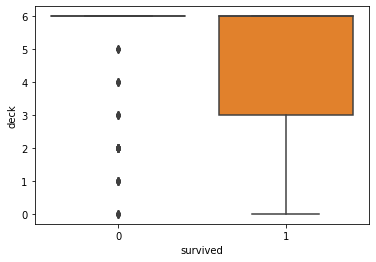

In [139]:
sns.boxplot(x="survived",y="deck", data=Ti_e)

In [167]:
Ti_e = Ti_e.drop(["pclass","sibsp","parch","embarked","embark_town","alone","who","alive","class","deck"], axis=1)

In [168]:
#OHE needed for class, deck
dummies = pd.get_dummies(df['class'], prefix='class')
dummies.drop(dummies.columns[0], axis=1, inplace=True)
Ti_e = pd.concat([Ti_e, dummies], axis=1)

dummies = pd.get_dummies(df['deck'], prefix='deck')
dummies.drop(dummies.columns[0], axis=1, inplace=True)
Ti_e = pd.concat([Ti_e, dummies], axis=1)
Ti_e.head()

,survived,sex,age,fare,adult_male,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,1,28,18,1,0,1,0,0,0,0,0,1
1,1,0,52,207,0,0,0,0,1,0,0,0,0
2,1,0,34,41,0,0,1,0,0,0,0,0,1
3,1,0,48,189,0,0,0,0,1,0,0,0,0
4,0,1,48,43,1,0,1,0,0,0,0,0,1


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def train_test_rmse(feature_cols):
    X = Ti_e[feature_cols]
    y = Ti_e["survived"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [170]:
fc=['survived', 'sex', 'age', 'fare', 'adult_male', 'class_Second', 'class_Third', 'deck_B', 'deck_C',
 'deck_D', 'deck_E', 'deck_F', 'deck_G']

train_test_rmse(fc)

4.657308901744886e-14

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model_logistic = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(Ti_e.iloc[:,1:],Ti_e.iloc[:,0],test_size=0.2,random_state=42)

In [193]:
model_logistic.fit(x_train, y_train)
predictions = model_logistic.predict(x_test)
score = model_logistic.score(x_test, y_test)
print (score)

0.8044692737430168


C:\Users\SIsab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
from sklearn import model_selection
scoring = 'roc_auc'
results = model_selection.cross_val_score(model_logistic ,Ti_e.iloc[:,1:],Ti_e.iloc[:,0], scoring=scoring)


C:\Users\SIsab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SIsab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [195]:
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.855 (0.017)


In [196]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[87 18]
 [17 57]]


In [197]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.7541899441340782


In [198]:
from sklearn import model_selection
scoring = 'roc_auc'
results = model_selection.cross_val_score(model ,Ti_e.iloc[:,1:],Ti_e.iloc[:,0], scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.778 (0.017)


In [199]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[82 23]
 [21 53]]


In [200]:
model= RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.7932960893854749


In [201]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=0)
gb_clf.fit(x_train, y_train)
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Accuracy score (validation): 0.782


In [202]:
predictions = gb_clf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[87 18]
 [21 53]]


In [185]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [205]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'n_estimators': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [187]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'bootstrap': True, 'max_depth': 80, 'n_estimators': 20}

In [188]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Error: {:0.4f}.'.format(np.sum(errors)))
    
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [191]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Error: 37.0000.
Average Error: 0.2067 degrees.
Accuracy = -inf%.


Gradient boosting

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=0)
gb_clf.fit(x_train, y_train)
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Accuracy score (validation): 0.782


In [204]:
predictions = gb_clf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[87 18]
 [21 53]]
